# <div style="text-align: center;">M2 MALIA Deep learning</div>
# <div style="text-align: center;">rendu n°1 : rétropropagation</div>


### <div style="text-align: center;">Réalisé par : </div>
### <div style="text-align: center;">GHIZLAN Moqim</div>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)

### Fontions d'activation et leurs dérivées ( pour la rétropropagation )

Ces fonctions implémentent les activations ***sigmoid***, ***relu*** et ***tanh***, utilisées dans les réseaux de neurones pour introduire de la non-linéarité et permettre au modèle de s'adapter à des données complexes.
Les dérivées des fonctions d’activation sont calculées pour être utilisées dans l’algorithme de rétropropagation, permettant d'ajuster les poids en fonction de l'erreur obtenue en sortie.



In [17]:
# Fonctions d'activation (pour l'entrainement)
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def tanh(Z):
    return np.tanh(Z)


# Les dérivées des fonctions ( pour la rétrospropagation )
def sigmoid_derivative(A):
    return A * (1 - A)

def relu_derivative(A):
    return (A > 0).astype(float)

def tanh_derivative(A):
    return 1 - A**2


### Initialisation des paramètres

Cette fonction initialise les poids ***W*** et les biais ***b*** pour chaques couches. Les poids sont initialisés aléraoirement avec une faible variance ***(* 0.01)*** pour iviter une saturation des activations, alors que les biais sont initialisés à zéro.


In [18]:
def initialize_parameters(layer_sizes):
    """
    Initialise les paramètres (poids et biais) pour un réseaux de neurones en utilisant la structur
    spécifiée par `layer_sizes`.

    Paramètres:
    -----------
    layer_sizes : liste
        Une liste contenant le nombre de neurones dans chaque couche du réseau, avec les couches
        d'entrer, cachées, et de sortie.

    Retourne:
    ---------
    parameters : dictionnaire
        Dictionnaire contenant les matrices de poids et les vecteurs de biais pour chaque couche.
        - "W{l}" : Matrice de poids pour la couche l, de dimensions (layer_sizes[l], layer_sizes[l-1]).
        - "b{l}" : Vecteur de biais pour la couche l, de dimensions (layer_sizes[l], 1).

    Exemple:
    --------
    parameters = initialize_parameters([2, 4, 1])
    Ce code initialise un réseau avec une couche d'entrer de 2 neurones, une couche cachée de 4 neurones,
    et une couche de sortie de 1 neurone.
    """

    parameters = {}  # Dictionnaire pour stocker les poids et biais de chaques couches

    # Boucle sur chaques couches (sauf la couche d'entrer) pour initialiser W et b
    for l in range(1, len(layer_sizes)):
        # Initialisations des poids avec de petit valeurs aléraoire suivant une distribaution normale
        parameters[f"W{l}"] = np.random.randn(layer_sizes[l], layer_sizes[l-1]) * 0.01

        # Initialisations des biais avec des zéros
        parameters[f"b{l}"] = np.zeros((layer_sizes[l], 1))

    return parameters


### Choisir la fonction d’activation en fonction des paramètres de l’utilisateur


Cette fonction retourne la fonction d’activation et sa dérivée en fonction du nom passé en argument. Ca permet à l'utilisateur de configurer la fonction d'activation à utiliser pour chaques couches du réseaux.

In [19]:
def get_activation_function(name):
    """
    Retourne la fonction d'activation et sa dérivée en fonction du nom spécifié.

    Paramètres:
    -----------
    name : str
        Le nom de la fonction d'activation souhaitée. Doit être l'une des valeurs suivantes:
        - "sigmoid" : Fonction sigmoïde, souvent utilisée pour les sorties binaires.
        - "relu" : Rectified Linear Unit (ReLU), utilisée couramment pour les couches cachées.
        - "tanh" : Hyperbolic tangent (tanh), qui offre une meilleure échelle de valeurs que la sigmoïde.

    Retourne:
    ---------
    function : callable
        La fonction d'activation correspondant au nom donné.
    derivative : callable
        La fonction de dérivée associée à la fonction d'activation spécifiée.

    Exceptions:
    -----------
    ValueError :
        Levée si `name` ne correspond pas à une des fonctions d'activation supportées.

    Exemple:
    --------
    activation, activation_deriv = get_activation_function("sigmoid")
    """

    # Sélectionne et retourne la fonction d'activation et sa dérivée en fonction du nom
    if name == "sigmoid":
        return sigmoid, sigmoid_derivative
    elif name == "relu":
        return relu, relu_derivative
    elif name == "tanh":
        return tanh, tanh_derivative
    else:
        raise ValueError("Fonction d'activation no reconnue. Choisisez parmi 'sigmoid', 'relu', 'tanh'.")


### Génération des données pour les portes logiques


Génère les entrées et sorties pour les portes logiques ***AND***, ***OR*** et ***XOR***. Ces données servent de jeu d’entraînement pour le modèle.

In [20]:
def generate_logical_gate_data(gate_type):
    """
    Génère un jeu de données pour les portes logiques (AND, OR, XOR).

    Paramètres:
    -----------
    gate_type : str
        Type de porte logique pour laquelle on cherche à générer les données.
        Doit être 'AND', 'OR' ou 'XOR'.

    Retourne:
    ---------
    X : np.array
        Entrées (combinations binaires de 0 et 1) pour la porte logique.
        Chaque ligne est un vecteur d'entrée de deux valeurs binaires.
    Y : np.array
        Sorties attendues de la porte logique pour chaque combinaison d'entrée.
        Chaque ligne correspond à la sortie pour les valeurs d'entrée dans `X`.

    Exceptions:
    -----------
    ValueError :
        Levée si le `gate_type` n'est pas 'AND', 'OR' ou 'XOR'.

    Exemple:
    --------
    X, Y = generate_logical_gate_data("AND")
    """

    # Création de toutes les combinaisons d'entrées binaires pour une porte logique
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    # Génération des sorties en fonction du type de porte logique
    if gate_type == "AND":
        Y = np.array([[0], [0], [0], [1]])  # AND retourne 1 seulement si les deux entrées sont 1
    elif gate_type == "OR":
        Y = np.array([[0], [1], [1], [1]])  # OR retourne 1 si au moins une entrée est 1
    elif gate_type == "XOR":
        Y = np.array([[0], [1], [1], [0]])  # XOR retourne 1 si exactement une des entrées est 1
    elif gate_type == "NAND":
        Y = np.array([[1], [1], [1], [0]])
    elif gate_type == "NOR":
        Y = np.array([[1], [0], [0], [0]])
    else:
        # Si le type de porte est incorrect, lever une erreur
        raise ValueError("Type de porte non reconnu. Choisissez parmi: 'AND', 'OR', 'XOR', 'NAND', 'NOR'.")

    return X, Y


### Calcul du coût avec log loss pour la classification binaire


La fonction de coût utilise ***log loss***, adaptée aux tâches de classification binaire. Elle évalue la différence entre les prédictions du modèle (***A_output***) et les valeurs réelles (***Y***).


In [21]:
def compute_cost(A_output, Y):
    """
    Calcule le coût d'erreur pour un réseau de neurones en utilisant l'entropie croisée binaire.

    Paramètres:
    -----------
    A_output : np.array
        Activations de la couche de sortie (prédictions) du réseau pour chaque exemple.
    Y : np.array
        Sorties réelles (étiquettes) pour chaque exemple.

    Retourne:
    ---------
    cost : float
        Coût moyen (entropie croisée binaire) sur tous les exemples.
    """


    m = Y.shape[0] # Nombre d'exemples

    # Calcul du coût de l'entropie croisée binaire
    # On utilise le terme +1e-8 pour éviter les erreurs de calcul dues à log(0).
    cost = -(1 / m) * np.sum(Y * np.log(A_output + 1e-8) + (1 - Y) * np.log(1 - A_output + 1e-8))

    return cost


### Propagation avant avec activation configurable pour chaque couche


Effectue la propagation avant, calculant la sortie de chaque couche. Permet de spécifier des fonctions d'activation différentes pour les couches cachées et la couche de sortie, adaptant le réseau à différents types de données.


In [22]:
def forward_propagation(X, parameters, hidden_activation, output_activation):
    """
    Effectue la propagation avant dans un réseau de neurones, en appliquant les activations configurables
    pour les couches cachées et la couche de sortie.

    Paramètres:
    -----------
    X : np.array
        Matrice d'entrée (exemples en ligne, caractéristiques en colonne).
    parameters : dict
        Dictionnaire contenant les poids (W) et les biais (b) de chaque couche du réseau.
    hidden_activation : str
        Nom de la fonction d'activation pour les couches cachées (par ex. "relu" ou "tanh").
    output_activation : str
        Nom de la fonction d'activation pour la couche de sortie (par ex. "sigmoid" pour la classification binaire).

    Retourne:
    ---------
    A : np.array
        Activations finales de la couche de sortie.
    cache : dict
        Dictionnaire contenant les activations (A) et les valeurs de pré-activation (Z) pour chaque couche,
        utilisés pour la rétropropagation.

    """


    cache = {"A0": X} # Initialisation du cache avec l'entrée initiale (couche 0)


    L = len(parameters) // 2 # Nombre de couches dans le réseau (chaque W et b correspondent à une couche)

    # Récupération des fonctions d'activation pour les couches cachées et la couche de sortie
    hidden_activation_func, _ = get_activation_function(hidden_activation)
    output_activation_func, _ = get_activation_function(output_activation)

    # Propagation avant à travers chaque couche
    for l in range(1, L + 1):

        W, b = parameters[f"W{l}"], parameters[f"b{l}"] # Récupération des poids et des biais pour la couche actuelle
        A_prev = cache[f"A{l-1}"] # Récupération de l'activation de la couche précédente
        Z = np.dot(W, A_prev.T).T + b.T # Calcul de Z pour la couche actuelle (Z = W * A_prev + b)


        # Application de la fonction d'activation appropriée
        # Si c'est la dernière couche, on applique l'activation de sortie, sinon l'activation cachée
        A = output_activation_func(Z) if l == L else hidden_activation_func(Z)

        # Stockage de Z et A dans le cache pour utilisation ultérieure dans la rétropropagation
        cache[f"Z{l}"], cache[f"A{l}"] = Z, A


    return A, cache


### Rétropropagation avec activation configurable pour chaque couche

Effectue la rétropropagation en calculant les gradients des poids et des biais. Utilise les dérivées de la fonction d’activation choisie pour chaque couche.


In [23]:
def backward_propagation(parameters, cache, X, Y, hidden_activation, output_activation):
    """
    Effectue la rétropropagation pour calculer les gradients des poids et biais dans chaque couche
    d'un réseau de neurones en utilisant des fonctions d'activation configurables.

    Paramètres:
    -----------
    parameters : dict
        Dictionnaire contenant les poids (W) et les biais (b) pour chaque couche du réseau.
    cache : dict
        Dictionnaire contenant les valeurs intermédiaires (activations et Z) de chaque couche durant
        la propagation avant, nécessaires pour la rétropropagation.
    X : np.array
        Les données d'entrée.
    Y : np.array
        Les valeurs cibles pour les données d'entrée X.
    hidden_activation : str
        Nom de la fonction d'activation utilisée pour les couches cachées.
    output_activation : str
        Nom de la fonction d'activation utilisée pour la couche de sortie.

    Retourne:
    ---------
    gradients : dict
        Dictionnaire contenant les gradients de chaque poids (dW) et biais (db) calculés pour la mise à jour des paramètres.

    """

    gradients, m, L = {}, X.shape[0], len(parameters) // 2


    # Obtenir les fonctions de dérivée pour l'activation choisie dans la couche de sortie et les couches cachées | _ parce que la fonction d'activation n'est pas utilisée dans la rétropropagation
    _, output_activation_deriv = get_activation_function(output_activation)
    _, hidden_activation_deriv = get_activation_function(hidden_activation)

    # Récupération de l'activation finale (output) et initialisation de dA pour la rétropropagation
    A_output = cache[f"A{L}"]
    dA = - (Y / A_output) + (1 - Y) / (1 - A_output)  # Dérivée du coût par rapport à l'activation finale (log-loss)

    # Parcours des couches en sens inverse pour calculer les gradients
    for l in reversed(range(1, L + 1)):
        A_prev = cache[f"A{l-1}"]  # Activation de la couche précédente
        W = parameters[f"W{l}"]     # Poids de la couche actuelle
        Z = cache[f"Z{l}"]          # Valeur Z de la couche actuelle

        dZ = dA * output_activation_deriv(A_output) if l == L else dA * hidden_activation_deriv(Z) # Calcul du gradient dZ en fonction de la couche

        # Calcul du gradient de W et b
        dW = (1 / m) * np.dot(dZ.T, A_prev)  # Moyenne du gradient de W
        db = (1 / m) * np.sum(dZ, axis=0, keepdims=True).T  # Moyenne du gradient de b

        dA = np.dot(dZ, W) # Calcul de dA pour la couche précédente (propagation de l'erreur)

        # Stocker les gradients dans le dictionnaire
        gradients[f"dW{l}"] = dW
        gradients[f"db{l}"] = db


    return gradients


### Mise à jour des paramètres


Met à jour les paramètres ***W*** et ***b*** en utilisant les gradients calculés et le taux d’apprentissage (***learning_rate***).


In [24]:
def update_parameters(parameters, gradients, learning_rate):
    """
    Met à jour les paramètres du réseau de neurones en utilisant la descente de gradient.

    Paramètres:
    -----------
    parameters : dict
        Dictionnaire contenant les poids (W) et les biais (b) pour chaque couche du réseau.
    gradients : dict
        Dictionnaire contenant les gradients calculés pour chaque paramètre (dW, db) lors de la rétropropagation.
    learning_rate : float
        Taux d'apprentissage utilisée pour ajuster l'amplitude de la mise à jour des paramètres.

    Retourne:
    ---------
    parameters : dict
        Dictionnaire avec les points et les biais mis à jour pour chaques couches.
    """

    L = len(parameters) // 2 # Calculer le nombre de couches en divisant par 2 car chaque couche a un W et un b
    for l in range(1, L + 1):  # Boucle sur chaque couche pour mettre à jour W et b
        parameters[f"W{l}"] -= learning_rate * gradients[f"dW{l}"]  # Mise à jour des poids W en soustrayant le produit du taux d'apprentissage et du gradient dW
        parameters[f"b{l}"] -= learning_rate * gradients[f"db{l}"] # Mise à jour des biais b de la même manière avec le gradient db

    return parameters # retourne les paramètres mis à jour


### Fonction d'entraînement avec critère d'arrêt basé sur un seuil de coût


Fonction d’entraînement principale. Suit l'algorithme de descente de gradient pour minimiser le coût sur un nombre spécifié d'itérations ou jusqu'à ce qu'un seuil de coût soit atteint.


In [25]:
def train_model(X, Y, layer_sizes, learning_rate, iterations, cost_threshold=None, hidden_activation="relu", output_activation="sigmoid", print_cost=False, epochs_display=100):
    """
    Entraîne le modèle de réseau de neurones en utilisant la rétropropagation et la descente de gradient,
    avec la possibilité d'arrêter l'entraînement lorsque le coût atteint un seuil donné.

    Paramètres:
    -----------
    X : ndarray
        Les données d'entrée, par exemple les entrées d'une porte logique (ex. [[0, 0], [0, 1], ...]).
    Y : ndarray
        Les valeurs cibles ou sorties attendues correspondant aux données d'entrée.
    layer_sizes : list
        Liste des tailles de chaque couche du réseau (entrée, couches cachées, sortie).
    learning_rate : float
        Taux d'apprentissage utilisé pour la mise à jour des paramètres.
    iterations : int
        Nombre maximal d'itérations pour l'entraînement.
    cost_threshold : float, optionnel
        Si spécifié, l'entraînement s'arrête lorsque le coût descend en dessous de cette valeur.
    hidden_activation : str, optionnel
        Fonction d'activation pour les couches cachées, par exemple 'relu', 'tanh', 'sigmoid'.
    output_activation : str, optionnel
        Fonction d'activation pour la couche de sortie, généralement 'sigmoid' pour la classification binaire.
    print_cost : bool, optionnel
        Si True, affiche le coût toutes les 100 itérations.
    epochs_display : int, optionnel
        Fréquence à laquelle le coût est affiché si `print_cost` est True.
    Retourne:
    ---------
    parameters : dict
        Dictionnaire contenant les paramètres entraînés du modèle (poids et biais pour chaque couche).
    costs : list
        Liste des valeurs de coût calculées à chaque itération, utile pour visualiser l'apprentissage.

    """


    parameters = initialize_parameters(layer_sizes) # Génération des paramètres initiaux pour le réseaux
    costs = [] # Initialiser une liste pour stocker le coût à chaque itération

    for i in range(iterations): # Boucle principale d'entraînement pour un nombre d'itérations spécifié
        A_output, cache = forward_propagation(X, parameters, hidden_activation, output_activation) # Étape de propagation avant pour calculer les valeurs de sortie du réseau
        cost = compute_cost(A_output, Y) # Calcul du coût pour l'itération actuelle afin de suivre l'apprentissage
        gradients = backward_propagation(parameters, cache, X, Y, hidden_activation, output_activation) # Rétropropagation pour calculer les gradients du coût par rapport aux paramètres
        parameters = update_parameters(parameters, gradients, learning_rate) # Mise à jour des paramètres en utilisant les gradients et le taux d'apprentissage
        costs.append(cost) # Enregistrer le coût dans la liste pour pouvoir suivre la courbe d'apprentissage
        if cost_threshold and cost < cost_threshold: # Vérification du critère d'arrêt basé sur le seuil de coût
            print(f"Seuil de coût atteint à l'itération {i} avec un coût de {cost:.8f}")
            break # Arrêter l'entraînement si le seuil de coût est atteint
        if print_cost and i % epochs_display == 0: # Option pour afficher le coût périodiquement (toutes les 100 itérations)
            print(f"Coût après l'itération {i}: {cost:.8f}")
    return parameters, costs


### Evaluation du modèle

La fonction ***evaluate_model*** applique la propagation avant pour obtenir les valeurs de sortie puis binarise ces valeurs pour obtenir des prédictions catégoriques. Le seuil de 0.5 est utilisé pour les tâches de classification binaire (0 ou 1). Cette fonction est utile pour évaluer les performances du modèle après entraînement, en comparant les ***predictions*** et les valeurs réelles ***Y***.

In [26]:
def evaluate_model(X, Y, parameters, hidden_activation, output_activation):
    """
    Évalue les performances du modèle en calculant les prédictions binaires
    et les valeurs de sortie réelles.

    Paramètres:
    -----------
    X : ndarray
        Les données d'entrée (par exemple, les valeurs d'entrée pour une porte logique).
    Y : ndarray
        Les sorties attendues pour les données d'entrée, utilisées pour évaluer la précision.
    parameters : dict
        Le dictionnaire contenant les paramètres du modèle (poids et biais pour chaque couche).
    hidden_activation : str
        La fonction d'activation utilisée pour les couches cachées, ex: 'relu', 'tanh', 'sigmoid'.
    output_activation : str
        La fonction d'activation utilisée pour la couche de sortie, généralement 'sigmoid' pour les tâches de classification binaire.

    Retour:
    -------
    predictions : ndarray
        Les prédictions binaires du modèle (0 ou 1) basées sur un seuil de 0.5.
    A_output : ndarray
        Les valeurs de sortie réelles du modèle avant binarisation.

    Remarques:
    ----------
    Cette fonction utilise `forward_propagation` pour calculer les valeurs de sortie.
    Ensuite, elle applique un seuil (0.5) pour produire des prédictions binaires, qui sont
    renvoyées avec les sorties réelles pour comparer directement avec les valeurs attendues Y.
    """
    A_output, _ = forward_propagation(X, parameters, hidden_activation, output_activation)
    predictions = (A_output > 0.5).astype(int)  # Binariser les prédictions pour classification
    return predictions, A_output


### Affichage des courbes d'apprentissage pour les portes logiques

***plot_learning_curves*** permet de suivre l'évolution du coût pour chaque porte logique à travers les itérations d'entraînement. Cette visualisation est utile pour vérifier si le modèle converge efficacement. Par exemple, une courbe de coût qui diminue régulièrement puis se stabilise indique une bonne convergence, tandis qu’une courbe fluctuante peut indiquer un problème avec les paramètres d'entraînement (trop grand ***learning_rate***, ou problème dans les données).

In [27]:
def plot_learning_curves(costs_dict):
    """
    Affiche les courbes d'apprentissage en traçant le coût en fonction des itérations
    pour chaque cas de test (ex. portes logiques AND, OR, XOR).

    Paramètres:
    -----------
    costs_dict : dict
        Un dictionnaire où chaque clé est le nom d'une porte logique (par exemple, 'AND')
        et chaque valeur est une liste de coûts obtenus au cours de l'entraînement pour cette porte logique.

    Remarques:
    ----------
    Cet fonction affichera une courbe pour chaqu'un de cas de test, qui permet de visualiser
    la convergences de la modèle pour les différents types de portes logiques. La baise du coût
    indique que le modèle apprend, et un coût stabilisé montre qu'il est proche de la convergence.
    """
    for gate, costs in costs_dict.items():
        plt.plot(costs, label=f"Coût pour {gate}")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.legend()
    plt.title("Courbe d'apprentissage pour les portes logiques")
    plt.show()


### Utilisation du modèle avec les tests néscessaires


Test pour la porte logique: AND
Coût après l'itération 0: 0.69314737
Coût après l'itération 100: 0.56233466
Coût après l'itération 200: 0.56233394
Coût après l'itération 300: 0.56233296
Coût après l'itération 400: 0.56233139
Coût après l'itération 500: 0.56232810
Coût après l'itération 600: 0.56231922
Coût après l'itération 700: 0.56228264
Coût après l'itération 800: 0.56186654
Coût après l'itération 900: 0.42114591
Coût après l'itération 1000: 0.00431180
Coût après l'itération 1100: 0.00143322
Coût après l'itération 1200: 0.00079824
Coût après l'itération 1300: 0.00053632
Coût après l'itération 1400: 0.00039635
Coût après l'itération 1500: 0.00031112
Coût après l'itération 1600: 0.00025434
Coût après l'itération 1700: 0.00021404
Coût après l'itération 1800: 0.00018406
Coût après l'itération 1900: 0.00016096
Coût après l'itération 2000: 0.00014258
Coût après l'itération 2100: 0.00012785
Coût après l'itération 2200: 0.00011560
Coût après l'itération 2300: 0.00010539
Seuil de coût attei

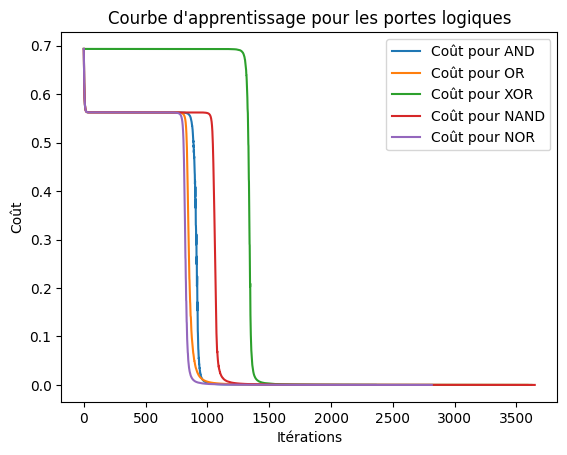

In [28]:
# Paramètres principaux pour le modèle de réseaus de neurones
layer_sizes = [2, 8, 8, 1]  # Définit l'architecture du réseau : 2 neurones en entrée, 2 couches cachées de 32 neurones, et 1 en sortie
# layer_sizes = [2, 16, 1]  # Définit l'architecture du réseau : 2 neurones en entrée, 16 dans une couche cachée, et 1 en sortie
learning_rate = 0.5       # Taux d'apprentissage pour la mise à jour des poids
iterations = 5000         # Nombre maximal d'itérations pour l'entraînement
cost_threshold = 1e-4     # Seuil de coût servant de critère d'arrêt : si le coût atteint ce niveau, l'entraînement s'arrête

# Définition des cas de test pour les portes logiques, avec les résultats attendus
test_cases = {
    'AND': np.array([[0], [0], [0], [1]]),  # Porte AND avec les sorties cibles
    'OR': np.array([[0], [1], [1], [1]]),   # Porte OR avec les sorties cibles
    'XOR': np.array([[0], [1], [1], [0]]),   # Porte XOR avec les sorties cibles
    'NAND': np.array([[1], [1], [1], [0]]),
    'NOR': np.array([[1], [0], [0], [0]]),
}

# Dictionnaire pour stocker les coûts d'entraînement pour chaque porte logique
costs_dict = {}

# Boucle de test pour chaque porte logique
for gate_type, expected_outputs in test_cases.items():
    print(f"\nTest pour la porte logique: {gate_type}")

    # Génération des données d'entrée et de sortie pour le type de porte logique spécifié
    X, Y = generate_logical_gate_data(gate_type)

    # Entraînement du modèle pour les données de la porte logique avec des fonctions d'activation et paramètres donnés
    parameters, costs = train_model(
        X, Y, layer_sizes, learning_rate, iterations,
        cost_threshold, hidden_activation="relu", output_activation="sigmoid",
        print_cost=True
    )

    # Évaluation du modèle entraîné
    predictions, A_output = evaluate_model(X, Y, parameters, hidden_activation="relu", output_activation="sigmoid")

    # Vérification des prédictions par rapport aux sorties attendues
    if np.array_equal(predictions, expected_outputs):
        print(f"Test réussi pour {gate_type} ! Les prédictions sont correctes.")
    else:
        print(f"Test échoué pour {gate_type}.")  # Affiche un message si le test échoue

    # Affichage des prédictions binaires et des sorties attendues pour comparaison
    print("Prédictions binaires:\n", predictions)
    print("Sorties réelles attendues:\n", expected_outputs)

    # Enregistrement des coûts d'entraînement pour ce type de porte logique
    costs_dict[gate_type] = costs

# Affichage des courbes de coût pour chaque porte logique
plot_learning_curves(costs_dict)


Ce graphique montre la courbe d'apprentissage pour trois portes logiques : AND, OR et XOR. L'axe des abscisses (x) représente les itérations, tandis que l'axe des ordonnées (y) représente le coût, qui diminue au fil de l'entraînement. Voici l'interprétation :

- AND et OR : Les courbes pour les portes logiques AND et OR (bleu et orange) montrent une convergence rapide du coût vers zéro, indiquant que le modèle a appris à reproduire correctement les comportements des portes AND et OR après environ 1000 itérations.

- XOR : La courbe verte représentant la porte XOR diminue beaucoup plus lentement. Elle atteint un coût proche de zéro vers 1500 itérations. Cela montre que la porte XOR est plus complexe à apprendre pour le modèle, car elle n'est pas linéairement séparable, nécessitant plus d'itérations pour converger.

Resultats attendus pour les portes logiques ***AND***, ***OR*** et ***XOR*** avec ces hyperparamètres :

In [29]:
"""

Test pour la porte logique: AND
Coût après l'itération 0: 0.69314737
Coût après l'itération 100: 0.56233466
Coût après l'itération 200: 0.56233394
Coût après l'itération 300: 0.56233296
Coût après l'itération 400: 0.56233139
Coût après l'itération 500: 0.56232810
Coût après l'itération 600: 0.56231922
Coût après l'itération 700: 0.56228264
Coût après l'itération 800: 0.56186654
Coût après l'itération 900: 0.42114591
Coût après l'itération 1000: 0.00431180
Coût après l'itération 1100: 0.00143322
Coût après l'itération 1200: 0.00079824
Coût après l'itération 1300: 0.00053632
Coût après l'itération 1400: 0.00039635
Coût après l'itération 1500: 0.00031112
Coût après l'itération 1600: 0.00025434
Coût après l'itération 1700: 0.00021404
Coût après l'itération 1800: 0.00018406
Coût après l'itération 1900: 0.00016096
Coût après l'itération 2000: 0.00014258
Coût après l'itération 2100: 0.00012785
Coût après l'itération 2200: 0.00011560
Coût après l'itération 2300: 0.00010539
Seuil de coût atteint à l'itération 2361 avec un coût de 0.00009993
Test réussi pour AND ! Les prédictions sont correctes.
Prédictions binaires:
 [[0]
 [0]
 [0]
 [1]]
Sorties réelles attendues:
 [[0]
 [0]
 [0]
 [1]]

Test pour la porte logique: OR
Coût après l'itération 0: 0.69314813
Coût après l'itération 100: 0.56233479
Coût après l'itération 200: 0.56233444
Coût après l'itération 300: 0.56233380
Coût après l'itération 400: 0.56233244
Coût après l'itération 500: 0.56232900
Coût après l'itération 600: 0.56231754
Coût après l'itération 700: 0.56225013
Coût après l'itération 800: 0.55963015
Coût après l'itération 900: 0.04217360
Coût après l'itération 1000: 0.00668038
Coût après l'itération 1100: 0.00285428
Coût après l'itération 1200: 0.00167373
Coût après l'itération 1300: 0.00114718
Coût après l'itération 1400: 0.00085505
Coût après l'itération 1500: 0.00067356
Coût après l'itération 1600: 0.00055086
Coût après l'itération 1700: 0.00046356
Coût après l'itération 1800: 0.00039812
Coût après l'itération 1900: 0.00034753
Coût après l'itération 2000: 0.00030748
Coût après l'itération 2100: 0.00027514
Coût après l'itération 2200: 0.00024844
Coût après l'itération 2300: 0.00022620
Coût après l'itération 2400: 0.00020729
Coût après l'itération 2500: 0.00019104
Coût après l'itération 2600: 0.00017699
Coût après l'itération 2700: 0.00016475
Coût après l'itération 2800: 0.00015393
Coût après l'itération 2900: 0.00014444
Coût après l'itération 3000: 0.00013588
Coût après l'itération 3100: 0.00012820
Coût après l'itération 3200: 0.00012131
Coût après l'itération 3300: 0.00011509
Coût après l'itération 3400: 0.00010939
Coût après l'itération 3500: 0.00010419
Seuil de coût atteint à l'itération 3589 avec un coût de 0.00009998
Test réussi pour OR ! Les prédictions sont correctes.
Prédictions binaires:
 [[0]
 [1]
 [1]
 [1]]
Sorties réelles attendues:
 [[0]
 [1]
 [1]
 [1]]

Test pour la porte logique: XOR
Coût après l'itération 0: 0.69314713
Coût après l'itération 100: 0.69314680
Coût après l'itération 200: 0.69314655
Coût après l'itération 300: 0.69314626
Coût après l'itération 400: 0.69314587
Coût après l'itération 500: 0.69314527
Coût après l'itération 600: 0.69314431
Coût après l'itération 700: 0.69314265
Coût après l'itération 800: 0.69313954
Coût après l'itération 900: 0.69313379
Coût après l'itération 1000: 0.69311742
Coût après l'itération 1100: 0.69306163
Coût après l'itération 1200: 0.69270855
Coût après l'itération 1300: 0.67617415
Coût après l'itération 1400: 0.01054084
Coût après l'itération 1500: 0.00272544
Coût après l'itération 1600: 0.00144240
Coût après l'itération 1700: 0.00095179
Coût après l'itération 1800: 0.00069998
Coût après l'itération 1900: 0.00054735
Coût après l'itération 2000: 0.00044671
Coût après l'itération 2100: 0.00037559
Coût après l'itération 2200: 0.00032295
Coût après l'itération 2300: 0.00028241
Coût après l'itération 2400: 0.00025028
Coût après l'itération 2500: 0.00022445
Coût après l'itération 2600: 0.00020311
Coût après l'itération 2700: 0.00018531
Coût après l'itération 2800: 0.00017016
Coût après l'itération 2900: 0.00015718
Coût après l'itération 3000: 0.00014593
Coût après l'itération 3100: 0.00013606
Coût après l'itération 3200: 0.00012739
Coût après l'itération 3300: 0.00011968
Coût après l'itération 3400: 0.00011283
Coût après l'itération 3500: 0.00010663
Coût après l'itération 3600: 0.00010107
Seuil de coût atteint à l'itération 3621 avec un coût de 0.00009996
Test réussi pour XOR ! Les prédictions sont correctes.
Prédictions binaires:
 [[0]
 [1]
 [1]
 [0]]
Sorties réelles attendues:
 [[0]
 [1]
 [1]
 [0]]

"""

"\n\nTest pour la porte logique: AND\nCoût après l'itération 0: 0.69314737\nCoût après l'itération 100: 0.56233466\nCoût après l'itération 200: 0.56233394\nCoût après l'itération 300: 0.56233296\nCoût après l'itération 400: 0.56233139\nCoût après l'itération 500: 0.56232810\nCoût après l'itération 600: 0.56231922\nCoût après l'itération 700: 0.56228264\nCoût après l'itération 800: 0.56186654\nCoût après l'itération 900: 0.42114591\nCoût après l'itération 1000: 0.00431180\nCoût après l'itération 1100: 0.00143322\nCoût après l'itération 1200: 0.00079824\nCoût après l'itération 1300: 0.00053632\nCoût après l'itération 1400: 0.00039635\nCoût après l'itération 1500: 0.00031112\nCoût après l'itération 1600: 0.00025434\nCoût après l'itération 1700: 0.00021404\nCoût après l'itération 1800: 0.00018406\nCoût après l'itération 1900: 0.00016096\nCoût après l'itération 2000: 0.00014258\nCoût après l'itération 2100: 0.00012785\nCoût après l'itération 2200: 0.00011560\nCoût après l'itération 2300: 0.

Resources :
- Le cours de Deep Learning de M. Julien Velcin
- Le cours de apprentissage supervisé par des réseaux de neurones de M. Dider Puzenat (M1)
- Les TDS et leurs corrections de M. Dider Puzenat (M1)
- Chatgpt pour la corrections des erreurs (les erreurs trop complexes)
- Ce site la (https://pyimagesearch.com/2021/05/06/backpropagation-from-scratch-with-python/) pour la rétropropagation